In [1]:
import sys
sys.path.insert(0, "/home/pidoux/MASTER/ML/projet/Projet/Module")

from Loss import *
from Linear import *
from Activation import *
from Sequential import *
from mltools import *

import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras.datasets import mnist

def onehot(x): # single digit
    out = [0] * 10
    out[x] = 1
    return out

2023-05-02 11:53:14.258260: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-02 11:53:14.479361: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-02 11:53:14.481005: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 11:53:17.526761: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalizing the data to help with the training
X_train /= 255
X_test /= 255
X_train = X_train[:5000]
y_train = y_train[:5000]
X_test = X_train[:1000]
y_test = y_train[:1000]
y_train = np.asarray([onehot(x) for x in y_train])

# parameters
d = X_train.shape[1]
d_prime1 = 128
d_prime2 = 64
out = 10
epoch = 1000
gradient_step = 1e-4
batchsize = 200

# initialization network
lin = Linear(d, d_prime1)
lin2 = Linear(d_prime1, d_prime2)
lin3 = Linear(d_prime2, out)
softmax = Softmax()
tan = TanH()
tan2 = TanH()
loss = CElogSMLoss()

# training
net = Sequential([lin,tan,lin2,tan,lin3])
opt = Optim(net,loss,eps=gradient_step)
L = opt.SGD(X_train,y_train,batchsize,epoch)

100%|██████████| 1000/1000 [04:40<00:00,  3.57it/s]


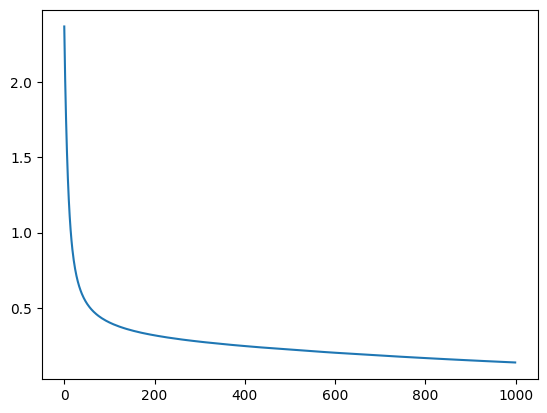

In [3]:
plt.plot(L)

Accuracy: 0.954


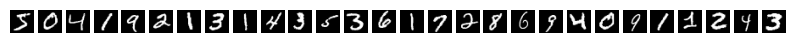

Predicted: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 3 4 3]


In [4]:
def label_func(x):
    return np.argmax(x,axis=1)
def predict(x):
    return label_func(softmax.forward(opt._net.forward(X_test)[-1]))
res = predict(X_test)

print("Accuracy: {}".format(np.sum(res == y_test)/len(y_test)))
def draw_pred(X_test,n=10):
    fig = plt.figure(figsize=(10,10))
    for i in range(n):
        ax = fig.add_subplot(1,n,i+1)
        ax.imshow(X_test[i].reshape(28,28),cmap='gray')
        ax.axis('off')
    plt.show()

draw_pred(X_test,n=28)
print("Predicted: {}".format(predict(X_test)[:28]))

100%|██████████| 50000/50000 [1:22:45<00:00, 10.07it/s]  


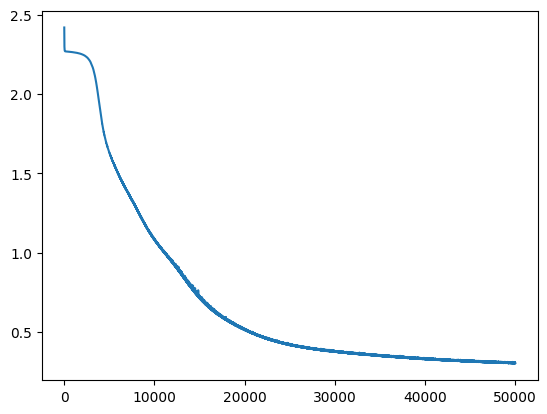

In [5]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def get_usps(l,datax,datay):
    if type(l)!=list:
        resx = datax[datay==l,:]
        resy = datay[datay==l]
        return resx,resy
    tmp =   list(zip(*[get_usps(i,datax,datay) for i in l]))
    tmpx,tmpy = np.vstack(tmp[0]),np.hstack(tmp[1])
    return tmpx,tmpy

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")
    plt.show()

uspsdatatrain = "data/USPS_train.txt"
uspsdatatest = "data/USPS_test.txt"
X_train,y_train = load_usps(uspsdatatrain)
X_test,y_test = load_usps(uspsdatatest)
X_train /= 255
X_test /= 255

y_train = np.asarray([onehot(x) for x in y_train])

d = X_train.shape[1]
d_prime1 = 64
d_prime2 = 32
d_prime3 = 16
out = 10
epoch = 50000
gradient_step = 0.00001
batchsize = 400

# initialization network
lin = Linear(d, d_prime1)
lin2 = Linear(d_prime1, d_prime2)
lin3 = Linear(d_prime2, d_prime3)
lin4 = Linear(d_prime3, out)
softmax = Softmax()
tan = TanH()
tan2 = TanH()
tan3 = TanH()
loss = CElogSMLoss()

# training
net = Sequential([lin,tan,lin2,tan,lin3, tan,lin4])
opt = Optim(net,loss,eps=gradient_step)
L = opt.SGD(X_train,y_train,batchsize,epoch)

plt.plot(L)

Accuracy: 0.8455406078724464


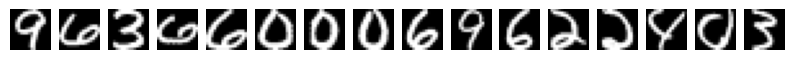

Predicted: [9 6 3 2 6 0 0 0 6 9 6 2 2 4 0 3]


In [6]:
def label_func(x):
    return np.argmax(x,axis=1)
def predict(x):
    return label_func(softmax.forward(opt._net.forward(X_test)[-1]))
res = predict(X_test)

print("Accuracy: {}".format(np.sum(res == y_test)/len(y_test)))
def draw_pred(X_test,n=10):
    fig = plt.figure(figsize=(10,10))
    for i in range(n):
        ax = fig.add_subplot(1,n,i+1)
        ax.imshow(X_test[i].reshape(16,16),cmap='gray')
        ax.axis('off')
    plt.show()

draw_pred(X_test,n=16)
print("Predicted: {}".format(predict(X_test)[:16]))